In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

url = "/content/drive/MyDrive/Datasets/SpamFiltration/train.csv"
df = pd.read_csv(url)
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [ ]:
df.shape

(1306122, 3)

In [ ]:
df.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

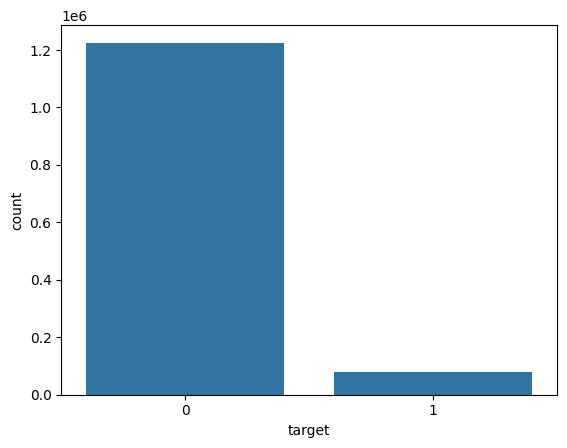

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
def equal_sampling(dataframe, variables):
    """
    Perform equal sampling from a pandas DataFrame based on a list of variables.

    Parameters:
    - dataframe: pandas DataFrame.
    - variables: list of column names in the dataframe to be used for creating groups.

    Returns:
    - A pandas DataFrame with equal representation from each group formed by the unique combinations of the specified variables.
    """
    # Generate all unique combinations of the specified variables
    combinations = dataframe.groupby(variables).size().reset_index().rename(columns={0: 'count'})

    # Determine the smallest group size among these combinations
    min_size = combinations['count'].min()

    # Initialize an empty DataFrame to store the sampled data
    sampled_df = pd.DataFrame(columns=dataframe.columns)

    # Loop through each unique combination, filter the dataframe, and sample
    for _, row in combinations.iterrows():
        filter_criteria = (dataframe[variables[0]] == row[variables[0]])
        for var in variables[1:]:
            filter_criteria &= (dataframe[var] == row[var])

        sampled_group = dataframe[filter_criteria].sample(n=min_size, replace=True) # Use replace=True if min_size is larger than the group
        sampled_df = pd.concat([sampled_df, sampled_group])

    return sampled_df

In [ ]:
b_df = equal_sampling(df, ['target'])

<Axes: xlabel='target', ylabel='count'>

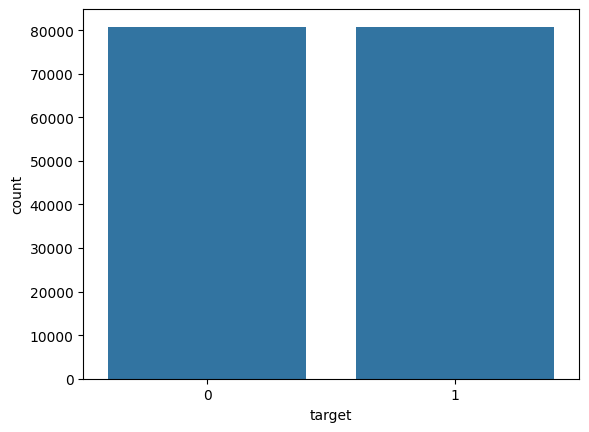

In [ ]:
sns.countplot(x='target', data=b_df)

In [ ]:
b_df.target.value_counts()
b_df.shape

(161620, 3)

In [ ]:
b_df
b_df.shape

(161620, 3)

In [ ]:
b_df.dropna()
b_df.shape

(161620, 3)

In [ ]:
df.dropna()
df.shape

(1306122, 3)

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")

Do you have an adopted dog, how would you enco.


In [ ]:
# Install the necessary module
!pip install nltk

# Import the necessary module
import nltk

In [ ]:
# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#initiate lemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()

tokens = word_tokenize(b_df['question_text'].str.cat(sep=' '))
len(tokens)

2716882

In [ ]:
lemmatized_list = []
count = 0
for i in b_df['question_text']:
    doc = nlp(i)
    lemmatized = [token.lemma_ for token in doc if token.pos_ != 'ADP' and token.is_alpha]
    processed_text = ' '.join(lemmatized)
    lemmatized_list +=[processed_text]
    count+=1
    if count%100 ==0:
        print(count, end= " ")
    if count%2000 == 0:
        print()

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 
2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 
4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 
6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 
8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 
10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 
12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 
14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 
16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 
18100 18200 18300 1

In [ ]:
b_df["lemmatized_text"] = lemmatized_list
b_df

,qid,question_text,target,lemmatized_text
1226113,f04cc96a5efdb8e7494b,Where can I find knowledge database about symb...,0,where can I find knowledge database symbiosis ...
291374,3911cf0ef986ebf952ef,How do I interpret a linear regression results...,0,how do I interpret a linear regression result ...
217377,2a8511e260d07e8c862c,Does equality and justice always go together?,0,do equality and justice always go together
378732,4a3cb480b052a5633cf8,What is the rule of visa in bitcoin? Or is the...,0,what be the rule visa bitcoin or be there any ...
309386,3c9a9addf4ce66a14ad0,What are some French scholarly sources on the ...,0,what be some french scholarly source the US an...
...,...,...,...,...
30561,05f89bc85c0a7fecefea,Are liberals getting exposed everywhere?,1,be liberal getting expose everywhere
1201236,eb6c7d567401ffb6597e,Why do people want to change the Canadian anth...,1,why do people want to change the canadian anth...
1282581,fb5d25d1fca334bc5f12,Srilankans hate Arab moors as traitors?,1,Srilankans hate arab moor traitor
530081,67c918a938e07c33202b,Why are Nigerians obsess with religion?,1,why be Nigerians obsess religion


In [ ]:
all_words = [nltk.word_tokenize(sent) for sent in lemmatized_list]

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Assuming 'all_words' is the list of lists after removing stopwords
processed_list = [' '.join(words) for words in all_words]

In [ ]:
b_df["processed_text"] = processed_list
b_df

,qid,question_text,target,lemmatized_text,processed_text
1226113,f04cc96a5efdb8e7494b,Where can I find knowledge database about symb...,0,where can I find knowledge database symbiosis ...,I find knowledge database symbiosis agriculture
291374,3911cf0ef986ebf952ef,How do I interpret a linear regression results...,0,how do I interpret a linear regression result ...,I interpret linear regression result analyse SPSS
217377,2a8511e260d07e8c862c,Does equality and justice always go together?,0,do equality and justice always go together,equality justice always go together
378732,4a3cb480b052a5633cf8,What is the rule of visa in bitcoin? Or is the...,0,what be the rule visa bitcoin or be there any ...,rule visa bitcoin issue
309386,3c9a9addf4ce66a14ad0,What are some French scholarly sources on the ...,0,what be some french scholarly source the US an...,french scholarly source US grow cultural lingu...
...,...,...,...,...,...
30561,05f89bc85c0a7fecefea,Are liberals getting exposed everywhere?,1,be liberal getting expose everywhere,liberal getting expose everywhere
1201236,eb6c7d567401ffb6597e,Why do people want to change the Canadian anth...,1,why do people want to change the canadian anth...,people want change canadian anthem make gender...
1282581,fb5d25d1fca334bc5f12,Srilankans hate Arab moors as traitors?,1,Srilankans hate arab moor traitor,Srilankans hate arab moor traitor
530081,67c918a938e07c33202b,Why are Nigerians obsess with religion?,1,why be Nigerians obsess religion,Nigerians obsess religion


In [ ]:
# Assuming 'df' is your DataFrame and 'target_column' is the name of the column you want to check
target_column_dtype = b_df['target'].dtype

print(f"The datatype of the target column is: {target_column_dtype}")

unique_values = b_df['target'].value_counts()
print(unique_values)

The datatype of the target column is: object
0    80810
1    80810
Name: target, dtype: int64


In [ ]:
default_vector = [0.0] * 300

b_df["vector"] = b_df["processed_text"].apply(lambda x: nlp(x).vector if isinstance(x, str) else default_vector)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    b_df.vector.values,
    b_df.target,
    test_size=0.2,
    random_state=2022
)
# Convert target variable to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     16269
           1       0.78      0.80      0.79     16055

    accuracy                           0.78     32324
   macro avg       0.78      0.78      0.78     32324
weighted avg       0.78      0.78      0.78     32324



In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79     16269
           1       0.76      0.93      0.84     16055

    accuracy                           0.82     32324
   macro avg       0.84      0.82      0.81     32324
weighted avg       0.84      0.82      0.81     32324



In [ ]:
b_df

,qid,question_text,target,lemmatized_text,processed_text,vector
1226113,f04cc96a5efdb8e7494b,Where can I find knowledge database about symb...,0,where can I find knowledge database symbiosis ...,I find knowledge database symbiosis agriculture,"[1.2089375, -0.9569483, -0.5545306, -1.9330434..."
291374,3911cf0ef986ebf952ef,How do I interpret a linear regression results...,0,how do I interpret a linear regression result ...,I interpret linear regression result analyse SPSS,"[-1.38364, 0.8255914, -0.05390995, -0.09552348..."
217377,2a8511e260d07e8c862c,Does equality and justice always go together?,0,do equality and justice always go together,equality justice always go together,"[-1.9259199, 2.9297576, -4.280742, 2.478816, 0..."
378732,4a3cb480b052a5633cf8,What is the rule of visa in bitcoin? Or is the...,0,what be the rule visa bitcoin or be there any ...,rule visa bitcoin issue,"[-0.3079168, 3.4658751, 1.8989627, 0.64224756,..."
309386,3c9a9addf4ce66a14ad0,What are some French scholarly sources on the ...,0,what be some french scholarly source the US an...,french scholarly source US grow cultural lingu...,"[-2.2058868, -0.38627413, 0.7771709, 1.8651162..."
...,...,...,...,...,...,...
30561,05f89bc85c0a7fecefea,Are liberals getting exposed everywhere?,1,be liberal getting expose everywhere,liberal getting expose everywhere,"[-0.54553246, -0.52133, -1.91668, 0.886395, 1...."
1201236,eb6c7d567401ffb6597e,Why do people want to change the Canadian anth...,1,why do people want to change the canadian anth...,people want change canadian anthem make gender...,"[-1.0945715, 2.7862735, -2.4654233, -0.3848845..."
1282581,fb5d25d1fca334bc5f12,Srilankans hate Arab moors as traitors?,1,Srilankans hate arab moor traitor,Srilankans hate arab moor traitor,"[0.13550206, 0.33277, -0.008748007, -0.5877420..."
530081,67c918a938e07c33202b,Why are Nigerians obsess with religion?,1,why be Nigerians obsess religion,Nigerians obsess religion,"[-1.193, 2.50231, -2.4026334, -0.38113335, 1.9..."


In [ ]:
print(b_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161620 entries, 1226113 to 856279
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   qid              161620 non-null  object
 1   question_text    161620 non-null  object
 2   target           161620 non-null  object
 3   lemmatized_text  161620 non-null  object
 4   processed_text   161620 non-null  object
 5   vector           161620 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
None


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     16269
           1       0.89      0.90      0.90     16055

    accuracy                           0.90     32324
   macro avg       0.90      0.90      0.90     32324
weighted avg       0.90      0.90      0.90     32324



In [ ]:
!pip install joblib

In [ ]:
import joblib

# Save the trained model
joblib.dump(clf, '/content/drive/MyDrive/Models/SpamFiltration/SpamFiltrationRFC.1.pkl')

['/content/drive/MyDrive/Models/SpamFiltration/SpamFiltrationRFC.1.pkl']

In [ ]:
# Example of new text data
new_text = "you are a idiot"

# Preprocess the new text
doc = nlp(new_text)
lemmatized = [token.lemma_ for token in doc if token.pos_ != 'ADP' and token.is_alpha]
processed_text = ' '.join(lemmatized)
processed_text = [nltk.word_tokenize(processed_text)]
processed_text = [[w for w in words if w not in stopwords.words('english')] for words in processed_text]
processed_text = [' '.join(words) for words in processed_text]

# Vectorize the new text data using spaCy
new_text_vector = nlp(processed_text[0]).vector

# Reshape the vector to match the format of X_train_2d
new_text_vector_2d = np.array(new_text_vector).reshape(1, -1)

# Make predictions
prediction = clf.predict(new_text_vector_2d)

print("Predicted class:", prediction)


Predicted class: [1]


In [ ]:
import spacy
import nltk
import numpy as np

def preprocess_text(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if token.pos_ != 'ADP' and token.is_alpha]
    processed_text = ' '.join(lemmatized)
    processed_text = [nltk.word_tokenize(processed_text)]
    processed_text = [[w for w in words if w not in stopwords.words('english')] for words in processed_text]
    processed_text = [' '.join(words) for words in processed_text]
    return processed_text

def predict_class(text, clf):
    processed_text = preprocess_text(text)
    new_text_vector = nlp(processed_text[0]).vector
    new_text_vector_2d = np.array(new_text_vector).reshape(1, -1)
    prediction = clf.predict(new_text_vector_2d)
    return prediction[0]

# Example of new text data
new_text = "you are racist"

# Make predictions using the function
predicted_class = predict_class(new_text, clf)

print("Predicted class:", predicted_class)


Predicted class: 1


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/SpamFiltration/train-balanced-lemmatization-stopwords.csv'
b_df.to_csv(file_path, index=False)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Define a dictionary of classifiers
# classifiers = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Naive Bayes': GaussianNB(),
#     'Neural Network': MLPClassifier(),
#     'KNN': KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# }

# # Train, predict, and evaluate each model
# best_model = None
# best_accuracy = 0

# for name, clf in classifiers.items():
#     # Train the model
#     clf.fit(X_train_2d, y_train)

#     # Make predictions
#     y_pred = clf.predict(X_test_2d)

#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)

#     # Print classification report
#     print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

#     # Print accuracy
#     print(f"Accuracy for {name}: {accuracy}\n")

#     # Update best model if needed
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_model = name

# # Print the best model
# print(f"The most accurate model is: {best_model} with accuracy: {best_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     16269
           1       0.83      0.83      0.83     16055

    accuracy                           0.83     32324
   macro avg       0.83      0.83      0.83     32324
weighted avg       0.83      0.83      0.83     32324

Accuracy for Logistic Regression: 0.8328795941096399

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81     16269
           1       0.80      0.86      0.83     16055

    accuracy                           0.82     32324
   macro avg       0.82      0.82      0.82     32324
weighted avg       0.82      0.82      0.82     32324

Accuracy for Decision Tree: 0.8196386585818587

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     16269
      

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     16269
           1       0.87      0.90      0.89     16055

    accuracy                           0.89     32324
   macro avg       0.89      0.89      0.89     32324
weighted avg       0.89      0.89      0.89     32324

Accuracy for Neural Network: 0.8858433362207647

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79     16269
           1       0.76      0.93      0.84     16055

    accuracy                           0.82     32324
   macro avg       0.84      0.82      0.81     32324
weighted avg       0.84      0.82      0.81     32324

Accuracy for KNN: 0.8171637173617127

The most accurate model is: Random Forest with accuracy: 0.8987749040960277
